<img src="ml2_group_assignment.png" width="800"/>

# <font color=green> Introduction </font>

The assignment is focused on solving the Forest Cover Type Prediction: https://www.kaggle.com/c/forest-cover-type-prediction/overview. This task proposes a classification problem: predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data).

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. 

**You must predict the Cover_Type for every row in the test set (565892 observations).**

<img src="tree_types.png" width="800"/>

# <font color=green> Table of contents </font>

* Data Analysis
* Exploratory Data Analysis
* Feature Engineering & Selection
* Compare Several Machine Learning Models
* Perform Hyperparameter Tuning on the Best Model
* Interpret Model Results
* Evaluate the Best Model with Test Data (replying the initiating question)
* Summary & Conclusions

# Sections 
* [Libaries used](#0)
* [1. Import Data](#1)
* [2. Data analysis](#2)  
  * [2.1.Explanation of variables](#2.1)
      * [1.2.1 XX](#2.1.1)
* [3. Exploratory Data Analysis](#3)
  * [3.1 Analysis of the Dataset using EDA](#3.1)
  * [3.2 D'Agostino and Pearson's Test](#3.2)  
  * [3.3 Checking Variable Completeness ](#3.3)
  * [3.4 Correlation Matrix ](#3.4)  
  * [3.5 Paired density, scatterplot matrix and 3D Graphics ](#3.5)   
  * [3.6 Categorial EDA ](#3.6) 
      * [3.6.1 Categorial Bar Diagrams](#3.6.1)  
      * [3.6.2.Violinplot with Dependent Variable](#3.6.2)  
      * [3.6.3.Treemap for categorial Data](#3.6.3) 
* [4. Baseline Model](#4)
  * [4.0 Prepare Data and Standardization](#4.0)
  * [4.1 Random Forest](#4.1) 
  * [4.2 Gradient Boosting](#4.2)  
  * [4.3 Decision Trees](#4.3)
  * [4.4 K-Nearest Neighbors (KNN)](#4.4)  
  * [4.5 Logistic Regression](#4.5) 
  * [4.6 Naive Bayes](#4.6) 


<img src="roosevelt-national-forest.jpeg" width=1200 height=800 align="center">

<a id='0'></a>
# <font color=green> Libraries used </font>

In [1]:
!pip install squarify

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns  # Graphing
import matplotlib.pyplot as plt
import squarify #treemap
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#from yellowbrick.classifier import ROCAUC
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

<a id='0'></a>
##  <font color=green>0.Import the Data </font>
Let’s load the training data and create data frame

In [4]:
data_train = pd.read_csv("train.csv")
data_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


Let's keep the original dataset for later comparisons and make a copy for the FE process

In [5]:
df_original = data_train.copy()

In [6]:
data_train.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3
15119,15120,2475,197,34,319,78,270,189,244,164,...,0,0,0,0,0,0,0,0,0,3


In [7]:
data_test = pd.read_csv("test.csv")
data_test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


## <font color=green> Dataset split on the new features & Normalisation  <font>

Select features from the feature selection are transferred to cvs

In [8]:
import pandas as pd
X_selected1 = pd.read_csv("X_selected.csv")
y_selected1 = pd.read_csv("y_selected.csv")

In [9]:
X_selected1 = X_selected1[X_selected1.columns.drop(list(X_selected1.filter(regex='Unnamed:')))]
y_selected1 = y_selected1[y_selected1.columns.drop(list(y_selected1.filter(regex='Unnamed:')))]

In [10]:
print(X_selected1.shape)
print(y_selected1.shape)

if X_selected1.shape[0] != y_selected1.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(15120, 21)
(15120, 1)


We need to filter out the dummy variables for the normalization 

In [11]:
column_list = X_selected1.columns
scale_numerical  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
scale_categorial= [column for column in column_list if column not in scale_numerical ]

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Splitting the data into train and validation test 

In [15]:
column_list = X_selected1.columns

X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_selected1, y_selected1, test_size=0.20, random_state=42,stratify=y_selected1)
print("The shape of validation data:{} and {} ".format(X_val_new.shape,y_val_new.shape))
print("The shape of training data:{} and {} ".format(X_train_new.shape,y_train_new.shape))

The shape of validation data:(3024, 21) and (3024, 1) 
The shape of training data:(12096, 21) and (12096, 1) 


In [16]:
X_train_new[scale_numerical] = scaler.fit_transform(X_train_new[scale_numerical])
X_val_new[scale_numerical] = scaler.fit_transform(X_val_new[scale_numerical])

In [17]:
y_train_new = y_train_new.values.ravel()
y_val_new = y_val_new.values.ravel()

In [18]:
X_train_new.head()

,Wilderness_Area1,Subalpine_Climate,Wilderness_Area4,Wilderness_Area3,Family_Moran,Elevation_+_Slope,Elevation_+_Hillshade_Noon,Elevation_+_Hillshade_9am,Elevation_+_Hillshade_3pm,Elevation,...,Soil_Type3,Soil_Type12,Rock_outcrop_complex,Lower_Montane_Climate,Horizontal_Distance_To_Roadways^2,Family_Catamount,Elevation_x_Hillshade_Noon,Elevation_+_Vertical_Distance_To_Hydrology,Elevation_+_Aspect,Elevation^2
14128,0,0,0,1,0,0.550556,0.547972,0.566995,0.533237,0.543303,...,0,0,0,0,0.078302,1,0.637583,0.541972,0.519913,0.457033
4425,0,1,0,1,0,0.504550,0.516815,0.508374,0.539017,0.506546,...,0,0,0,0,0.058748,0,0.655608,0.423590,0.552381,0.419638
909,1,1,0,0,0,0.532861,0.546983,0.541379,0.564066,0.536254,...,0,0,0,0,0.542542,0,0.685116,0.462764,0.575758,0.449788
5123,0,0,0,1,0,0.487867,0.494560,0.510345,0.486513,0.485398,...,0,0,0,0,0.107116,1,0.628189,0.420577,0.467100,0.398550
10901,0,0,0,1,0,0.350354,0.355094,0.351232,0.384875,0.350453,...,0,0,1,0,0.084766,1,0.481630,0.300043,0.434199,0.271307


# <font color=green> 7 Re-run models with the new selected features  <font>
## <font color=green> Dataset split on the new features  <font>
Some classes such as SDG classifier , Random Forest classifier and naive Bayes classifier can handle mutliple classes naively. Others like logistic regression or Support Vector Machine classifier are stricly binary classifier. However there are various strategies to perform multiclass classification with multiple binary classifiers. 
* Decision Trees
* Random Forest (XGB Boost)
* KNN
* Logistic Regression 

Checking Correlation among features 

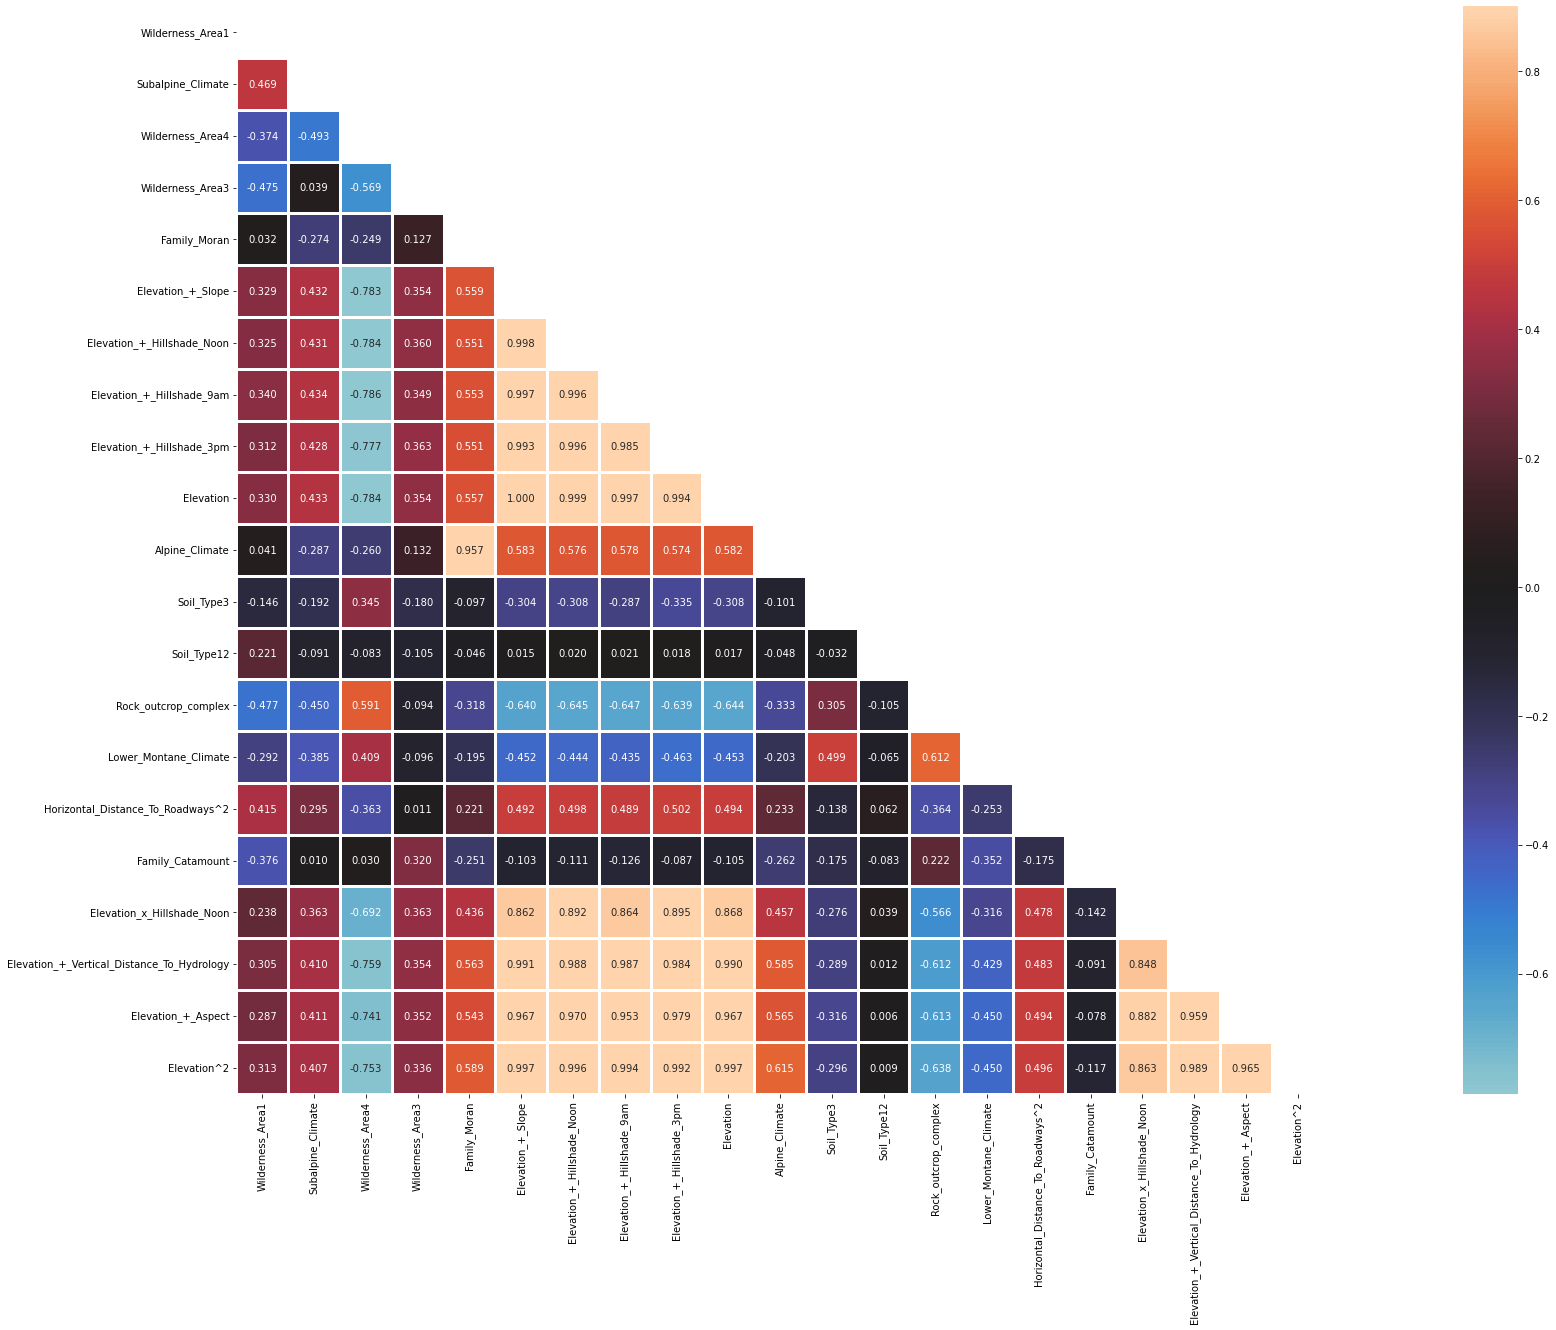

In [19]:
#Heatmap - Checking for autocorrelation among variables 
matrix = X_selected1.corr()
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(50,20))
heatmap = sns.heatmap(matrix, center=0, fmt=".3f", square=True, annot=True, linewidth=1.3, mask = mask,vmax=0.9);
plt.show()

## <font color=green> 7.1. KNN  <font>
KNN is better on smaller dataset, however we will evaluate the performance of this model 

In [20]:
from sklearn.neighbors import KNeighborsClassifier

To find out the best value for k we will use a for loop, and with the range from 1 to 200 range (1,200,10). I reduced the range to 50 but will use iterations of 1. And it gives me the best K = 1. 

In [30]:
k_neighbors_list = range (1,100,1)

results_list = []

for k in k_neighbors_list:
    clf_k = clf = KNeighborsClassifier(n_neighbors=k, p=1)
    clf.fit(X_train_new, y_train_new)
    y_pred_test = clf.predict(X_val_new)
    acc_k = accuracy_score(y_val_new, y_pred_test)
    
    results_list.append({
        "k": k,
        "acc": acc_k
    })
    
results = pd.DataFrame(results_list)

In [31]:
test = results.sort_values('acc', ascending = False) 
test

,k,acc
7,8,0.759259
10,11,0.758267
11,12,0.757937
9,10,0.757275
12,13,0.756944
...,...,...
91,92,0.689484
86,87,0.689484
98,99,0.689484
93,94,0.689153


Text(0, 0.5, 'Testing Accuracy')

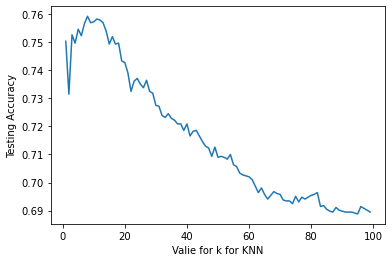

In [39]:
plt.plot(results['k'],results['acc'])
plt.xlabel('Valie for k for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
Using Grridsearch and cross validation we will adapt the model

## <font color=green> 6.6. Dimensionality reduction with PCA <font>

Principle components capture most of the variance of the data. The first principle components hold the most variance in the data, Each subsequent PCS is orthogonal to the last and has a lesser variance. In this way, given a set of x correlated variables over y samples, you achieve a set of uncorrelated PCS over the same y samples. 

https://plotly.com/python/pca-visualization/

In [ ]:
# First we will observe with a 3D Diagram the first threee PCAs
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=3)
components = pca.fit_transform(X_train)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_train,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
# Run PCA that holds 95% of all variance of the data 
from sklearn.decomposition import PCA
pca = PCA()
x_fit = pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.98)+1

In [ ]:
#looking at the two first PCA to see if these can explain the dataset 

you can set the components to the ratio of variance you wish to preserve

In [ ]:
pca.explained_variance_ratio_

It is a bar chart where the height of each bar is the percentage of variance explained by the associated PC. 

In [ ]:
var = pca.explained_variance_[0:10] #percentage of variance explained
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

plt.figure(figsize=(10,7))
plt.bar(labels,var,color=['purple'])
plt.xlabel('Pricipal Component')
plt.ylabel('Proportion of Variance Explained')

In [ ]:
plt.plot(cumsum)


In [ ]:
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"})

In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

On top of that, we can also look at the combinations of variables that created each principal component with pca.components_**2. We could use a heat map to showcase this

In [ ]:
#Heatmap PCA
fig, ax = plt.subplots(figsize=(40,20)) 
col_name = ['x' + str(idx) for idx in range(0, X_train.shape[1])]

_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(col_name),
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

In [ ]:
# Convert back to DataFrame for readability
df_pca = pd.DataFrame(data=x_fit)
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca['label'] = y_train

In [ ]:
https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d

In [ ]:
# Plot Principal Component
_ = sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=df_pca['label'], palette=['red', 'green', 'blue'])


In [ ]:
https://www.codecademy.com/article/fe-filter-methods